<a href="https://colab.research.google.com/github/chaamu/Data-Science/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [16]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
# Normalize
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 107ms/step - loss: 1.0528 - accuracy: 0.6047 - val_loss: 1.0204 - val_accuracy: 0.5528
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5483 - accuracy: 0.7239 - val_loss: 0.5407 - val_accuracy: 0.7270
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4639 - accuracy: 0.7812 - val_loss: 0.4949 - val_accuracy: 0.7730
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3960 - accuracy: 0.8247 - val_loss: 0.4801 - val_accuracy: 0.7972
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3238 - accuracy: 0.8593 - val_loss: 1.8645 - val_accuracy: 0.6164
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2361 - accuracy: 0.8994 - val_loss: 0.6597 - val_accuracy: 0.8006
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1661 - accuracy: 0.9347 - val_loss: 0.8593 - val_ac

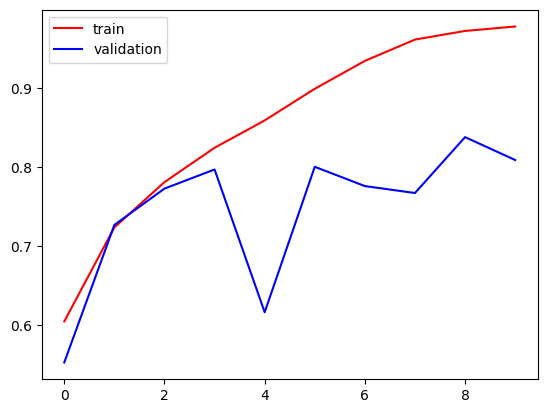

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

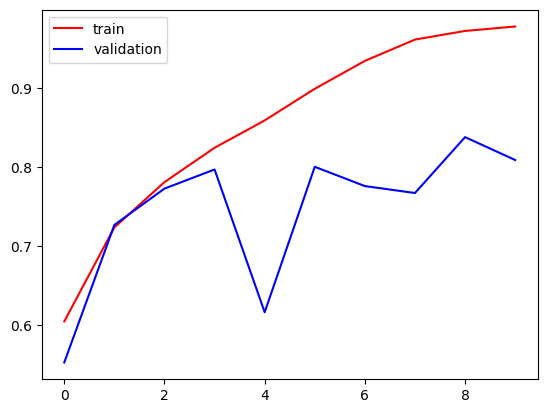

In [23]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

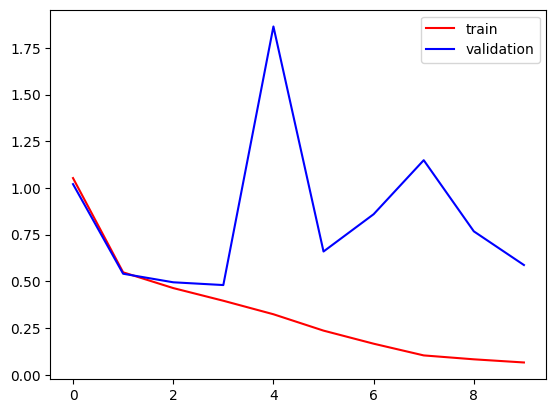

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

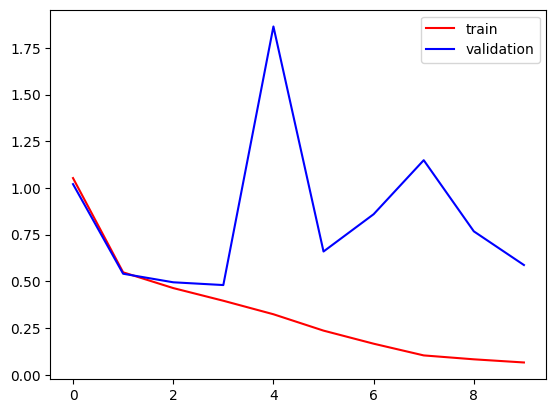

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [26]:
import cv2

In [52]:
test_img = cv2.imread('/content/cat1.jpg')

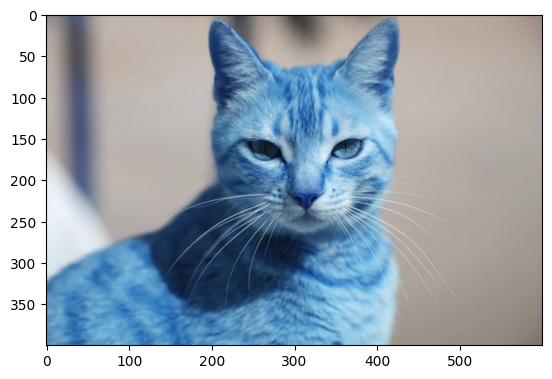

In [53]:
plt.imshow(test_img)

In [54]:
test_img.shape

(400, 600, 3)

In [55]:
test_img = cv2.resize(test_img,(256,256))

In [56]:
test_input = test_img.reshape((1,256,256,3))

In [57]:
model.predict(test_input)

1/1 [==============================] - 0s 36ms/step


array([[0.]], dtype=float32)